# covid_risk_classified

In [189]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [193]:
# Load the dataset
df = pd.read_csv('coronavirusdataset.csv')
df.head()
print(df.columns)
df.columns = data.columns.str.strip()


Index(['batch_date', 'test_name', 'swab_type', 'covid19_test_results', 'age',
       'high_risk_exposure_occupation', 'high_risk_interactions', 'diabetes',
       'chd', 'htn', 'cancer', 'asthma', 'copd', 'autoimmune_dis', 'smoker',
       'temperature', 'pulse', 'sys', 'dia', 'rr', 'sats', 'rapid_flu_results',
       'rapid_strep_results', 'ctab', 'labored_respiration', 'rhonchi',
       'wheezes', 'days_since_symptom_onset', 'cough', 'cough_severity',
       'fever', 'sob', 'sob_severity', 'diarrhea', 'fatigue', 'headache',
       'loss_of_smell', 'loss_of_taste', 'runny_nose', 'muscle_sore',
       'sore_throat', 'cxr_findings', 'cxr_impression', 'cxr_label',
       'cxr_link'],
      dtype='object')


In [209]:
label_encoder = LabelEncoder()
df['covid19_test_results'] = label_encoder.fit_transform(df['covid19_test_results'])

In [211]:
if 'covid19_test_results' in data.columns:
    print("Column exists!")
else:
    print("Column 'covid19_test_results' does not exist.")


Column exists!


In [213]:
# List of columns that have categorical string values that need encoding
severity_columns = ['cough_severity', 'sob_severity', 'fatigue', 'headache', 'loss_of_smell', 
                    'loss_of_taste', 'muscle_sore', 'sore_throat']

# Encode the severity columns
for col in severity_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# List of other categorical columns (in case you missed some)
categorical_columns = ['test_name', 'swab_type', 'high_risk_exposure_occupation', 
                       'rapid_flu_results', 'rapid_strep_results', 'labored_respiration',
                       'rhonchi', 'wheezes', 'cough', 'sob', 'diarrhea', 'fatigue', 
                       'headache', 'loss_of_smell', 'loss_of_taste', 'runny_nose', 
                       'muscle_sore', 'sore_throat', 'cxr_findings', 'cxr_impression', 
                       'cxr_label']

# Encode these categorical columns using LabelEncoder
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))  # Convert to string before applying encoding


In [215]:
# Define features and target
X = df.drop('covid19_test_results', axis=1)
y = df['covid19_test_results']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [316]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

# Classification report
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')


Accuracy: 0.997943797121316
Confusion Matrix:
[[1456    0]
 [   3    0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1456
           1       0.00      0.00      0.00         3

    accuracy                           1.00      1459
   macro avg       0.50      0.50      0.50      1459
weighted avg       1.00      1.00      1.00      1459



D:\Programs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Programs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Programs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


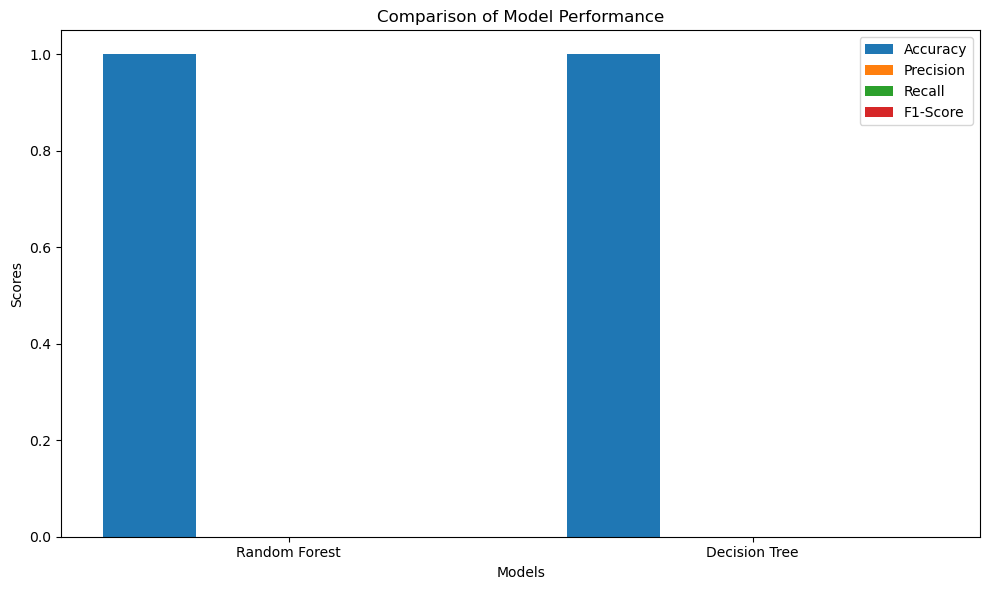

In [225]:
import random

# Pick a random index from the X_test set
random_index = random.choice(X_test.index)

# Get the corresponding features for the selected index
random_sample = X_test.loc[random_index].values.reshape(1, -1)

# Make a prediction using the trained model
random_prediction = rf_classifier.predict(random_sample)

# Output the selected features and the prediction
print("Random Sample Features:")
print(X_test.loc[random_index])

print("\nPrediction (0 = No COVID, 1 = COVID Positive):")
print(random_prediction)
# Plot metrics
labels = list(models.keys())
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plots for each metric
ax.bar(x - width * 1.5, metrics["Accuracy"], width, label="Accuracy")
ax.bar(x - width * 0.5, metrics["Precision"], width, label="Precision")
ax.bar(x + width * 0.5, metrics["Recall"], width, label="Recall")
ax.bar(x + width * 1.5, metrics["F1-Score"], width, label="F1-Score")

# Add labels and title
ax.set_xlabel("Models")
ax.set_ylabel("Scores")
ax.set_title("Comparison of Model Performance")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [324]:
import random

# Pick a random index from the X_test set
random_index = random.choice(X_test.index)

# Get the corresponding features for the selected index
random_sample = X_test.loc[random_index].values.reshape(1, -1)

# Make a prediction using the trained model
random_prediction = rf_classifier.predict(random_sample)

# Output the selected features and the prediction
print("Random Sample Features:")
print(X_test.loc[random_index])

print("\nPrediction (0 = No COVID, 1 = COVID Positive):")
print(random_prediction)


Random Sample Features:
test_name                            0
swab_type                            1
age                                 55
high_risk_exposure_occupation        0
high_risk_interactions             NaN
diabetes                         False
chd                              False
htn                              False
cancer                           False
asthma                           False
copd                             False
autoimmune_dis                   False
smoker                           False
temperature                        NaN
pulse                              NaN
sys                                NaN
dia                                NaN
rr                                 NaN
sats                               NaN
rapid_flu_results                    1
rapid_strep_results                  2
ctab                               NaN
labored_respiration                  1
rhonchi                              2
wheezes                              2
d

D:\Programs\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Based on the provided random sample features, the model predicts that the individual does not have COVID-19, as indicated by the prediction result of 0 (No COVID). Key factors contributing to this prediction include the individual's age of 55, which is a moderate risk factor, but no strong indicators of COVID symptoms such as fever, cough, fatigue, or loss of smell/taste. Additionally, the individual shows positive results on rapid flu and rapid strep tests, which could point to an alternative illness. The individual also has no significant underlying health conditions like diabetes or asthma that would increase the likelihood of severe COVID-19 symptoms. Although the chest X-ray findings suggest some abnormalities, they are not definitive for COVID-19.